# Activity Analysis
In this notebook we'll do some analysis of the Google "ActivitySegments" data using pandas. We'll plot our results using Matplotlib.

In [2]:
%matplotlib inline
import pandas as pd

In [3]:
# Set this to the name of your activities file
ACTIVITIES_PATH = 'activities.csv'
activities = pd.read_csv(ACTIVITIES_PATH, sep='|', encoding='utf-8', parse_dates=['start_timestamp', 'end_timestamp'])
print(f'Data has {activities.shape[0]} rows and {activities.shape[1]} columns')
activities.info()

Data has 2746 rows and 10 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746 entries, 0 to 2745
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   start_lat_e7            2746 non-null   int64              
 1   start_lon_e7            2746 non-null   int64              
 2   end_lat_e7              2746 non-null   int64              
 3   end_lon_e7              2746 non-null   int64              
 4   start_timestamp         2746 non-null   datetime64[ns, UTC]
 5   end_timestamp           2746 non-null   datetime64[ns, UTC]
 6   distance                2742 non-null   float64            
 7   activity_type           2746 non-null   object             
 8   confidence              2746 non-null   object             
 9   travel_distance_meters  2691 non-null   float64            
dtypes: datetime64[ns, UTC](2), float64(2), int64(4), object(2)
memory usage: 2

In [4]:
activities.head()

,start_lat_e7,start_lon_e7,end_lat_e7,end_lon_e7,start_timestamp,end_timestamp,distance,activity_type,confidence,travel_distance_meters
0,424621208,-712381988,424630900,-712380508,2020-04-05 15:34:17+00:00,2020-04-05 16:03:16+00:00,1802.0,RUNNING,HIGH,NaN
1,424637438,-712499563,424626610,-712395493,2020-04-07 21:19:05.295000+00:00,2020-04-07 21:21:17+00:00,862.0,IN_PASSENGER_VEHICLE,LOW,NaN
2,424637438,-712499563,424665207,-712379885,2020-04-07 21:21:17+00:00,2020-04-07 21:48:07+00:00,2914.0,RUNNING,MEDIUM,3211.125286
3,424625945,-712391947,424634929,-712389204,2020-04-08 22:15:45+00:00,2020-04-08 22:34:37+00:00,626.0,WALKING,HIGH,715.590138
4,424626746,-712393479,424633110,-712389022,2020-04-11 15:10:57.473000+00:00,2020-04-11 15:26:30+00:00,2319.0,RUNNING,HIGH,2488.224552


In [5]:
# Let's count the number of each activity type in the data=
print('Number of records per activity type:')
num_records = activities['activity_type'].value_counts()
num_records

Number of records per activity type:


WALKING                  1587
CYCLING                   489
IN_PASSENGER_VEHICLE      280
IN_TRAIN                  192
IN_TRAM                    84
IN_BUS                     40
IN_SUBWAY                  28
RUNNING                    19
UNKNOWN_ACTIVITY_TYPE      19
FLYING                      7
MOTORCYCLING                1
Name: activity_type, dtype: int64

In [6]:
# Calculate total travel distance by activity type *in kilometers*
print('Total distance traveled by activity type (km):')
distance = activities.groupby('activity_type')['travel_distance_meters'].sum() / 1000
distance.sort_values(inplace=True)
distance

Total distance traveled by activity type:


activity_type
MOTORCYCLING                 5.893817
RUNNING                     35.192988
IN_SUBWAY                  226.433304
IN_TRAM                    231.863310
CYCLING                   1203.518533
WALKING                   1599.552146
IN_BUS                    3897.438208
IN_PASSENGER_VEHICLE      7887.288409
FLYING                   10989.981219
UNKNOWN_ACTIVITY_TYPE    13384.307635
IN_TRAIN                 17027.939458
Name: travel_distance_meters, dtype: float64

Text(0, 0.5, '')

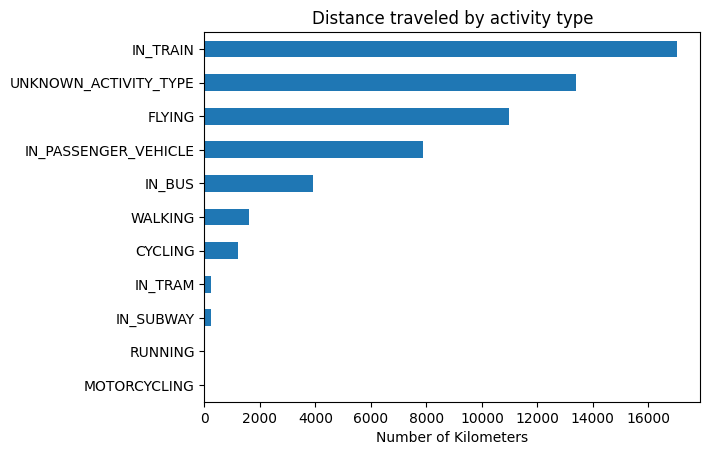

In [7]:
# Plot travel distance, by activity type
ax = distance.plot.barh()
ax.set_title('Distance traveled by activity type')
ax.set_xlabel('Number of Kilometers')
ax.set_ylabel('')

In [8]:
# Calculate total travel time by activity type *in hours*
print('Total time spent traveling by activity type (hours):')
activities['duration'] = activities['end_timestamp'] - activities['start_timestamp']
time_spent = activities.groupby('activity_type')['duration'].sum().dt.total_seconds() / 3600
time_spent.sort_values(inplace=True)
time_spent

Total time spent traveling by activity type:


activity_type
MOTORCYCLING               0.311338
IN_SUBWAY                 10.711113
IN_TRAM                   22.054648
RUNNING                   22.816709
FLYING                    58.738277
UNKNOWN_ACTIVITY_TYPE     66.033230
IN_BUS                    72.313195
CYCLING                  155.252575
IN_PASSENGER_VEHICLE     217.185568
IN_TRAIN                 244.836919
WALKING                  473.278386
Name: duration, dtype: float64

Text(0, 0.5, '')

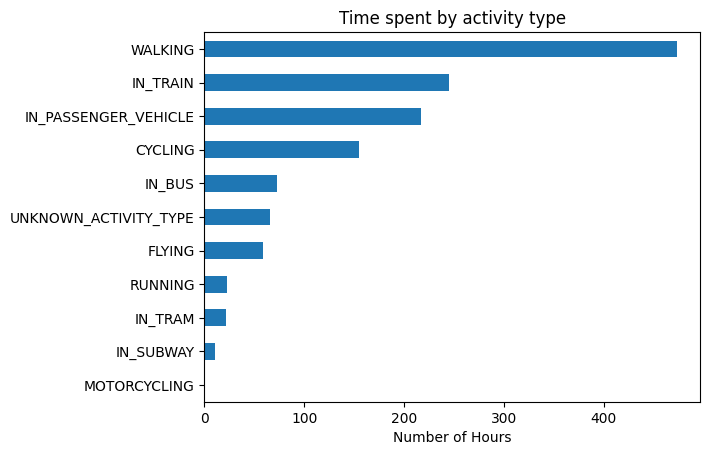

In [9]:
# Plot travel time, by activity type
ax = time_spent.plot.barh()
ax.set_title('Time spent by activity type')
ax.set_xlabel('Number of Hours')
ax.set_ylabel('')